In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cells(filename,testname):
    df = pd.read_csv(filename,sep='\t',index_col=0)
    df = df[sorted(df.columns)]
    if 'metastatic' in filename:
        df.columns = df.columns.values.astype(float)
        df.columns = df.columns.values.astype(int)
        df.columns = df.columns.values.astype(str)
    display(df)
    fig, ax = plt.subplots(1,1,dpi=100)
    hm = sns.heatmap(df,cmap='Blues',annot=True,fmt="d", yticklabels=True,xticklabels=True)
    hm.set_yticklabels(hm.get_yticklabels(),rotation=0)
    hm.set_xticklabels(hm.get_xticklabels(),rotation=45,horizontalalignment="right")
    fig.set_figwidth(len(df.columns))
    fig.set_figheight(len(df.index)/2)
    folder = f'./{filename.split("/")[1]}'
    name = f'{(filename.split("/")[2]).split(".")[0]}.png'
    plt.savefig(f'{folder}/{name}',dpi=500,bbox_inches="tight")
    plt.show()
    
    if testname == None:
        return
    f = open(testname)
    lines = f.readlines()
    groups = [line.strip('[]\n').replace("'",'').replace(' ','').split(',')\
              for line in lines]
    #make dataframes for the training and testing heatmaps
    test_hm = pd.DataFrame()
    train_hm = pd.DataFrame()
    
    #for each group, add a column to the training and testing heatmaps
    for group,index in zip(groups,range(len(groups))):
        
        #select the training and testing groups
        tdf = df[group].copy()
        trdf = df.drop(columns=group)
        #add the sum to the dataframe
        test_hm[str(index)] = tdf.sum(axis=1)
        train_hm[str(index)] = trdf.sum(axis=1)
    
    #display(group_hm)
    
    #plot the data
    fig, ax = plt.subplots(1,1,dpi=100)
    hm = sns.heatmap(test_hm,cmap='Blues',annot=True,fmt="d", yticklabels=True,xticklabels=True)
    hm.set_yticklabels(hm.get_yticklabels(),rotation=0)
    fig.set_figheight(len(df.index)/2)
    plt.show()
    
    fig, ax = plt.subplots(1,1,dpi=100)
    hm = sns.heatmap(train_hm,cmap='Blues',annot=True,fmt="d", yticklabels=True,xticklabels=True)
    hm.set_yticklabels(hm.get_yticklabels(),rotation=0)
    fig.set_figheight(len(df.index)/2)
    plt.show()

,AML1012.D0,AML210A.D0,AML314.D0,AML314.D31,AML328.D0,AML328.D113,AML328.D171,AML328.D29,AML329.D0,AML329.D20,...,AML997.D0,AML997.D35,BM1,BM2,BM3,BM4,BM5.34p,BM5.34p38n,MUTZ3,OCI.AML3
cDC-like,122,94,0,0,52,15,2,13,25,74,...,0,0,0,0,0,0,0,0,18,39
Prog-like,183,79,0,0,281,26,79,721,67,108,...,0,0,0,0,0,0,0,0,648,94
HSC-like,51,35,0,0,143,29,63,365,9,10,...,0,0,0,0,0,0,0,0,39,4
GMP-like,190,23,0,0,2,3,1,25,134,39,...,0,0,0,0,0,0,0,0,389,843
Mono-like,152,182,0,0,214,78,15,19,11,17,...,0,0,0,0,0,0,0,0,104,1
B,0,25,21,0,12,9,5,15,16,25,...,0,0,0,2,16,95,0,0,0,0
NK,3,56,6,5,75,280,137,134,29,30,...,0,6,0,1,13,143,0,0,0,0
T,14,111,38,18,108,1408,984,282,80,86,...,1,10,10,17,88,605,0,0,0,0
ProMono-like,158,51,0,0,1,2,1,2,7,11,...,0,0,0,0,0,0,0,0,304,197
CTL,13,16,9,17,22,84,49,34,8,33,...,1,10,5,3,38,215,0,0,0,0


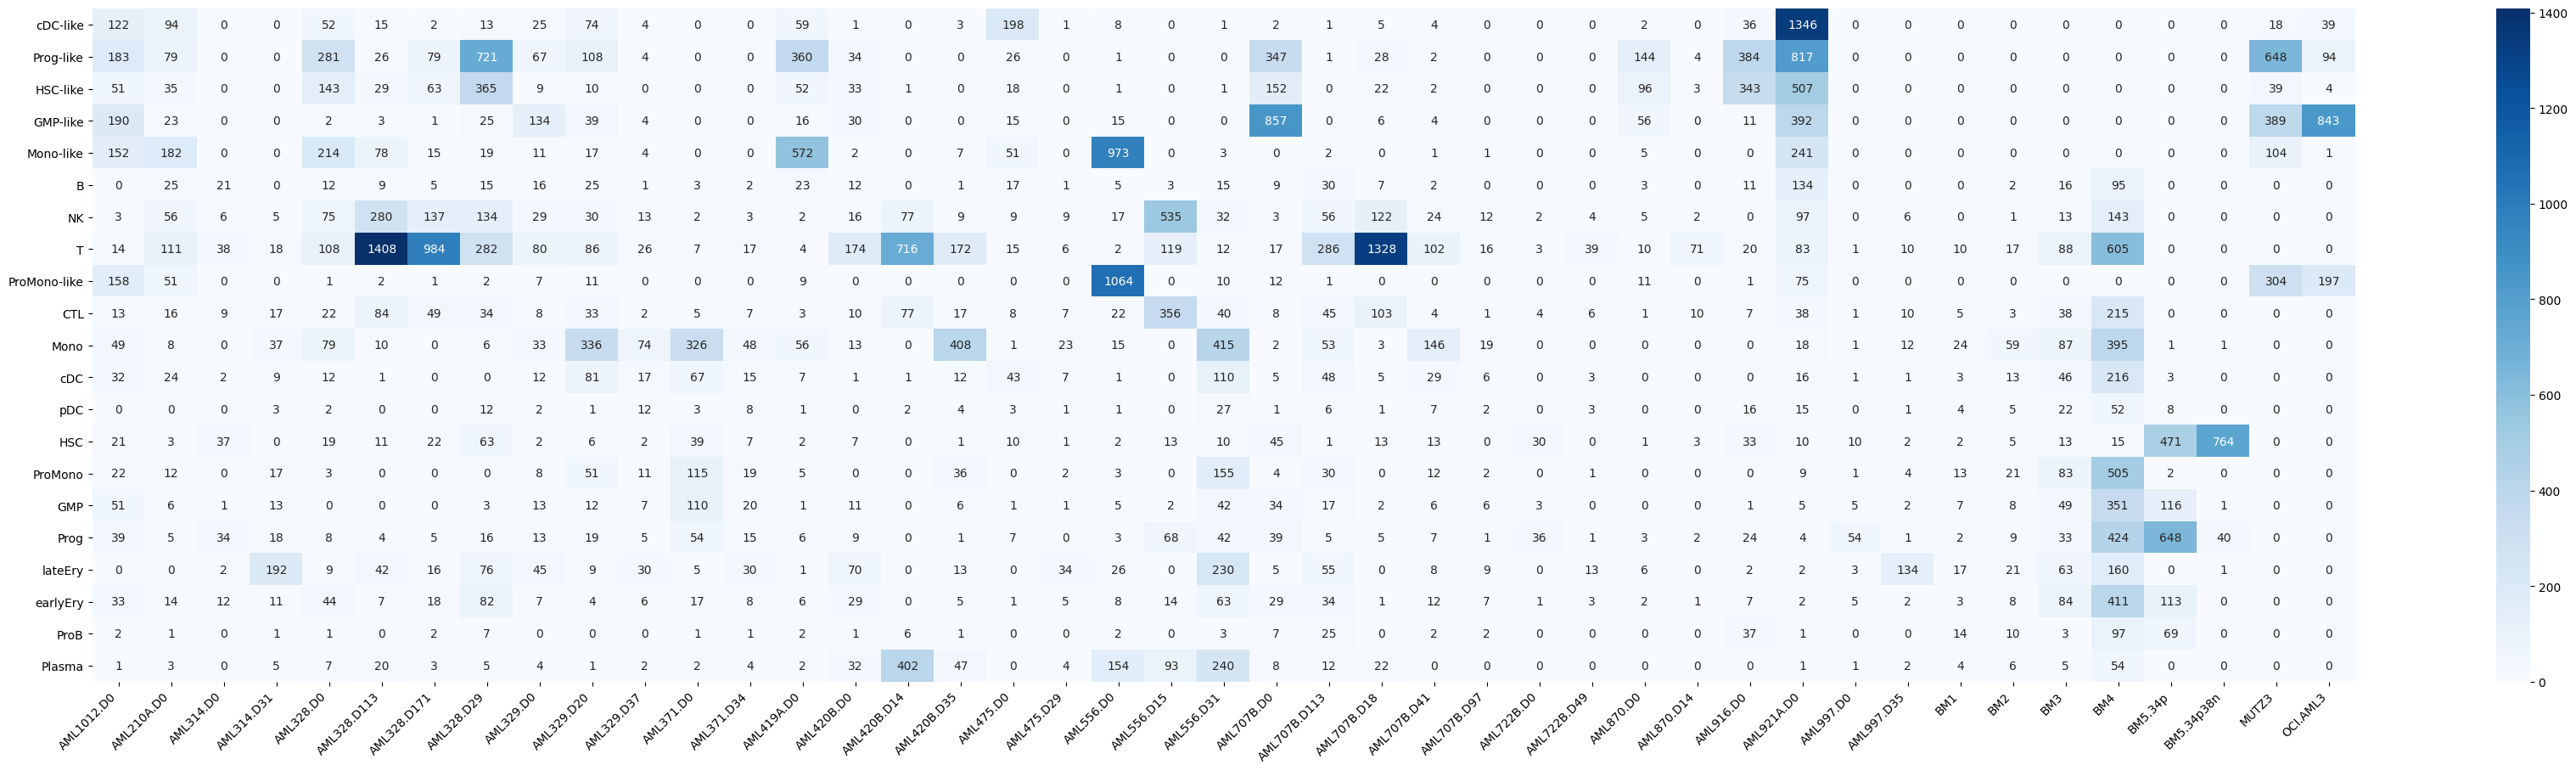

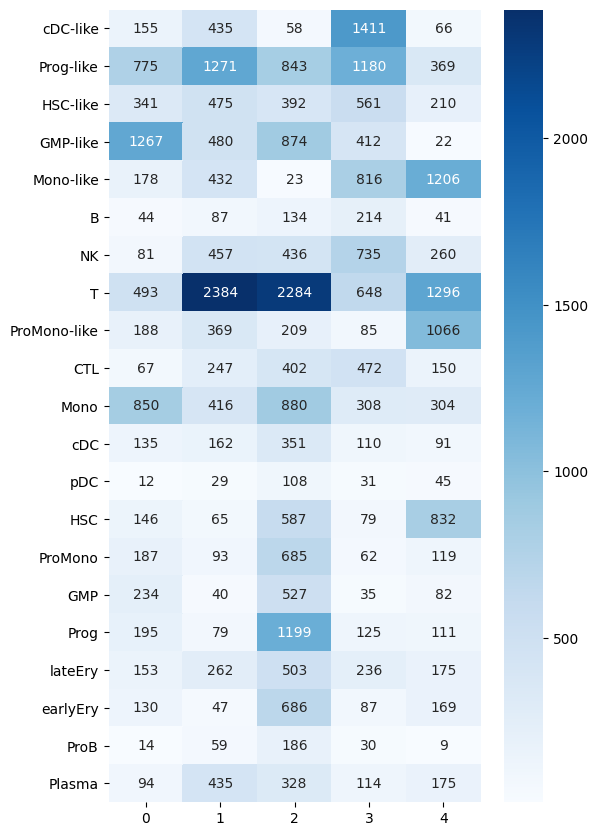

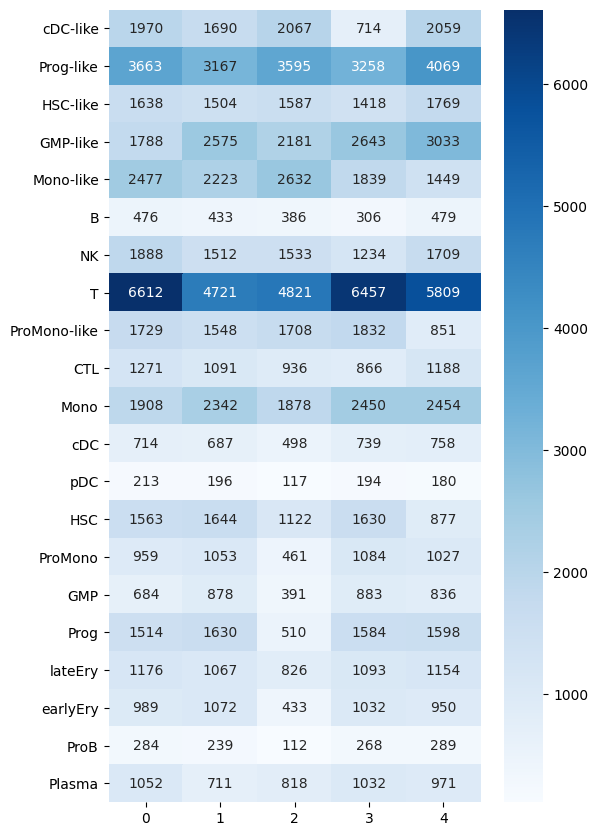

In [39]:
plot_cells('./aml/aml_patient_counts.tsv',
           './predictions_results/aml/vanGalan_patient_test.tsv'
          )

,BC01,BC02,BC03,BC03LN,BC04,BC05,BC06,BC07,BC07LN,BC08,BC09,BC10,BC11
Tumor,20,53,15,10,47,75,8,26,26,15,0,11,11
Myeloid,0,0,0,0,3,0,0,10,0,1,22,2,0
Tcell,0,0,9,5,4,0,0,7,2,0,27,0,0
Stromal,2,0,0,0,1,1,2,4,1,6,4,2,0
Bcell,0,0,9,38,0,0,8,3,23,0,2,0,0


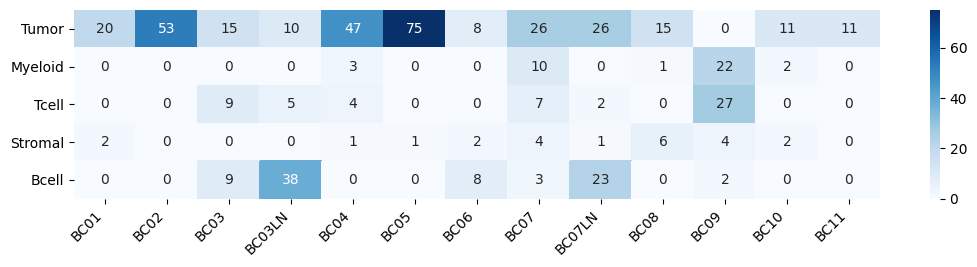

In [40]:
plot_cells('./breast/breast_patient_counts.tsv',
           None
          )

,Mel04.3,Mel102,Mel103,Mel105,Mel106,Mel110,Mel112,Mel116,Mel121.1,Mel126,...,Mel78,Mel79,Mel80,Mel81,Mel82,Mel84,Mel88,Mel89,Mel94,Mel98
T.CD4,21,47,15,38,16,11,12,15,17,13,...,0,48,94,7,11,25,44,30,60,13
T.CD8,31,32,57,33,8,16,11,29,26,54,...,0,224,58,18,6,26,45,103,26,125
Macrophage,2,28,14,7,0,89,4,4,11,14,...,0,1,3,1,8,24,47,22,7,26
Mal,0,169,137,14,94,123,28,0,5,0,...,120,486,92,120,6,16,124,100,6,76
NK,7,0,0,4,0,0,2,0,7,1,...,0,1,8,2,3,7,8,1,1,2
Endo.,0,0,2,40,0,0,0,0,1,0,...,0,9,17,4,0,2,0,2,14,0
T.cell,14,33,16,37,20,8,13,16,29,9,...,1,31,58,15,12,16,45,30,51,22
CAF,0,0,0,3,5,0,9,0,0,0,...,1,3,22,9,4,1,3,1,9,0
?,1,0,12,28,13,10,2,3,2,1,...,1,4,23,26,31,12,16,15,21,6


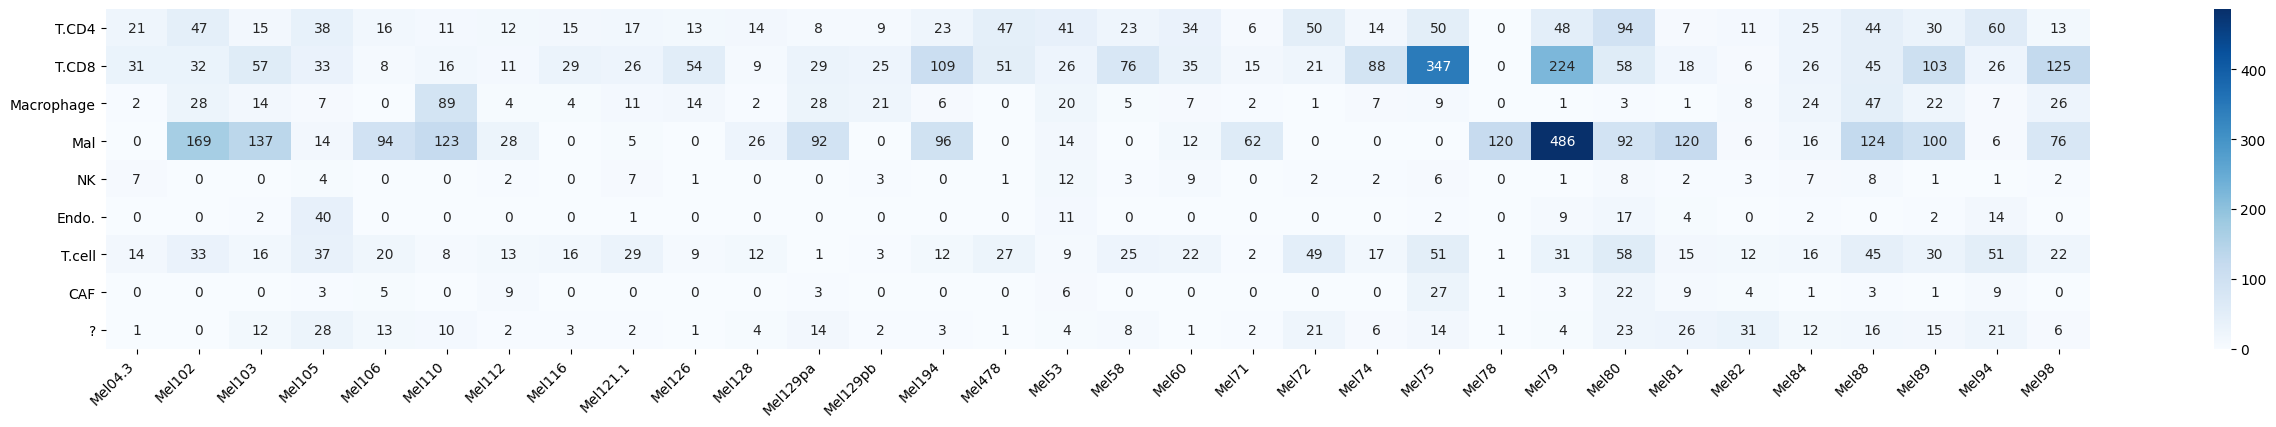

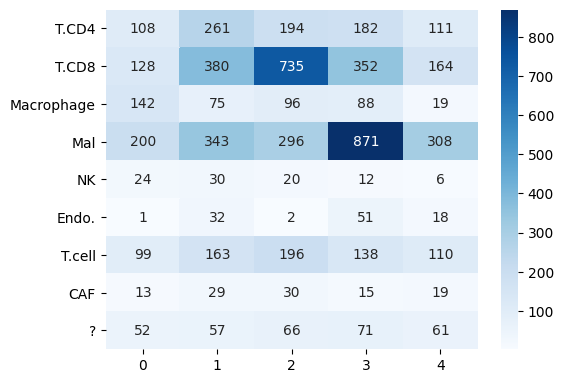

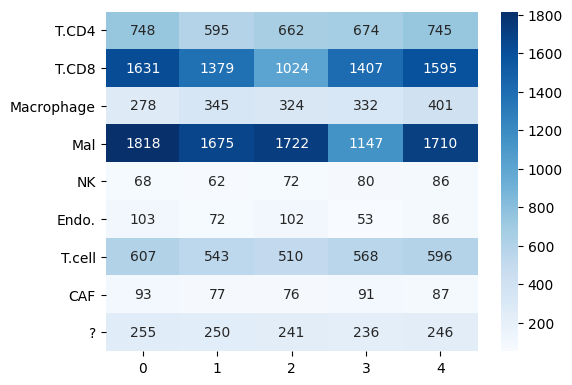

In [41]:
plot_cells('./melanoma/melanoma_patient_counts.tsv',
           './predictions_results/melanoma/JA_patient_test.tsv'
          )

,53,58,59,60,65,67,71,72,74,75,78,79,80,81,82,84,88,89,94
T,72,118,0,82,43,65,23,117,118,342,1,304,212,44,24,61,112,201,129
Unknown,18,16,8,25,10,10,10,28,10,1,8,41,38,23,15,25,56,42,122
Mal,16,0,54,9,4,0,54,0,0,0,120,468,125,133,32,14,115,98,10
Macro.,12,2,1,4,1,0,2,0,5,1,0,0,0,0,4,25,41,26,2
Endo.,11,0,0,0,0,0,0,0,0,0,0,2,29,2,0,1,0,1,19
NK,10,4,0,10,0,1,0,1,1,0,0,1,4,0,2,7,9,1,1
CAF,4,0,7,0,0,0,0,0,0,0,1,1,23,0,6,1,2,0,16


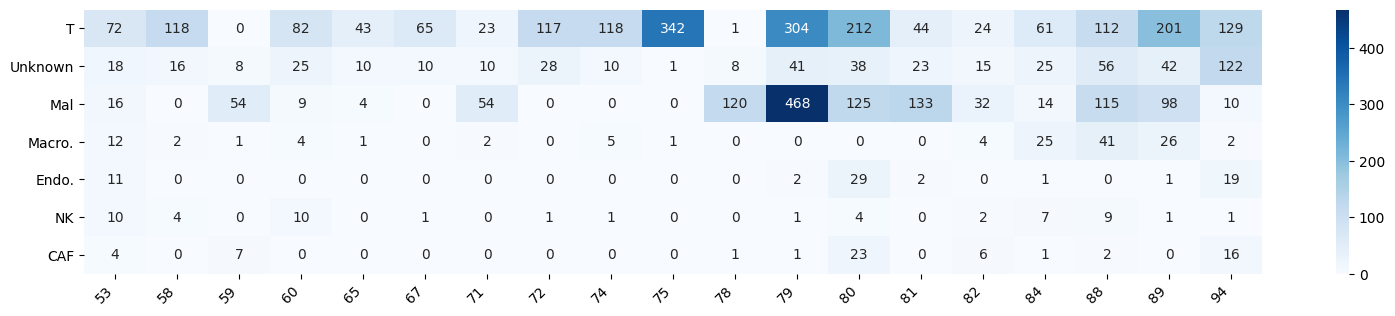

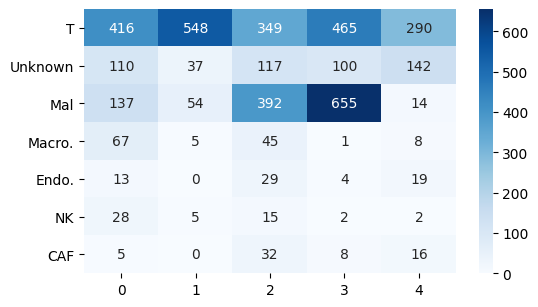

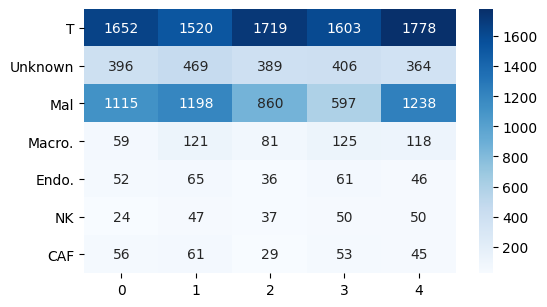

In [42]:
plot_cells('./metastatic_melanoma/metastatic_melanoma_patient_counts.tsv',
           './predictions_results/metastatic_melanoma/Tirosh_patient_test.tsv'
          )

,N1,N10,N11,N2,N3,N4,N5,N6,N7,N8,...,T22,T23,T24,T3,T4,T5,T6,T7,T8,T9
B cell,7,0,1,6,8,0,0,0,0,3,...,231,95,1,16,73,1,6,2,13,0
T cell,10,0,3,2,2,0,1,4,8,10,...,571,399,77,100,199,50,41,17,56,15
Ductal cell type 1,1684,997,436,750,176,719,607,237,723,372,...,0,3,191,1,8,150,494,241,6,64
Macrophage cell,91,25,60,111,32,0,3,7,7,105,...,244,318,83,192,96,201,246,29,84,138
Endothelial cell,522,255,769,314,111,205,225,328,203,357,...,29,180,498,176,52,295,402,116,21,5
Stellate cell,141,22,28,58,77,18,27,52,46,111,...,81,445,297,299,100,218,224,159,38,88
Ductal cell type 2,0,0,0,0,0,0,0,0,0,0,...,1032,282,229,381,414,97,290,137,469,1400
Fibroblast cell,301,5,39,168,16,26,7,81,20,143,...,26,1105,313,146,77,54,50,23,9,637
Acinar cell,46,233,40,518,6,0,13,3,44,76,...,0,1,62,0,2,14,53,17,1,2
Endocrine cell,21,6,6,32,27,6,4,6,64,43,...,1,37,66,6,6,35,65,6,0,5


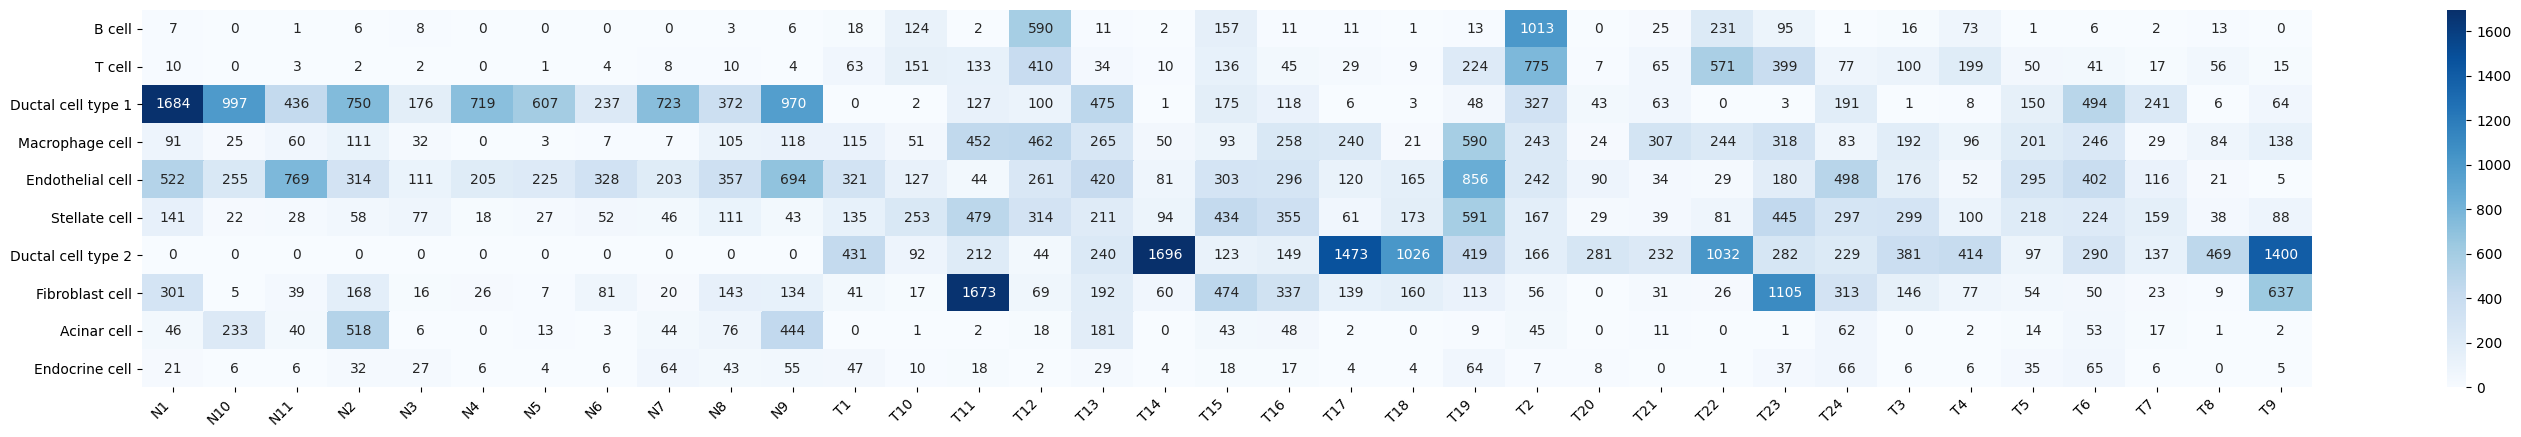

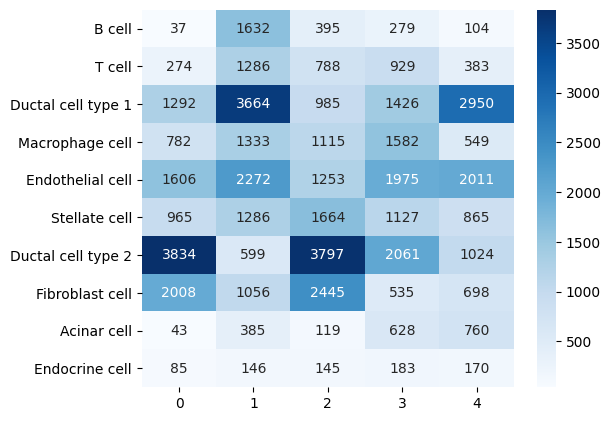

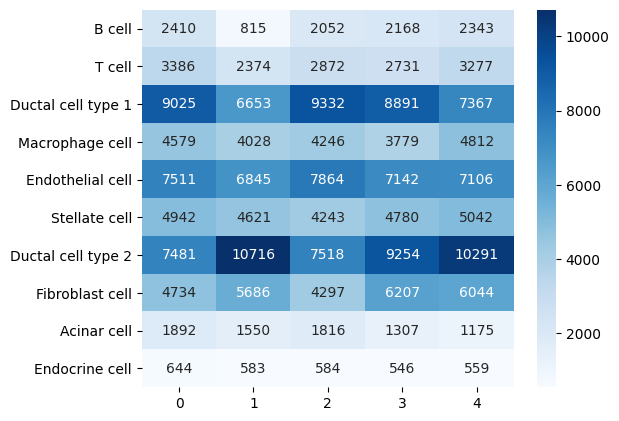

In [3]:
plot_cells('./pancreatic/pancreatic_patient_counts.tsv',
           './predictions_results/pancreatic/Peng_patient_test.tsv'
          )

,3a,3b,3c,3d,4a,4b,4c,4d,5a,5b,5c,5d
T cells,1280,1327,629,1355,871,2023,2684,2539,1062,1622,1642,2072
Macrophages,655,292,419,528,538,204,525,231,123,182,247,1666
B cells,265,210,111,90,51,162,356,286,227,799,372,80
Fibroblasts,181,189,24,124,55,16,23,37,131,146,127,29
Endothelial cell,127,104,8,481,144,15,9,82,50,170,71,23
Langerhans cells,108,78,62,23,17,11,5,21,18,47,38,107
Cancer cells,97,257,349,2,0,246,742,1017,894,217,1161,2
Mast cells,70,48,26,37,26,7,9,6,19,29,79,97
Alveolar cell,33,19,7,223,161,17,31,52,3,31,39,339
Granulocytes,32,12,4,174,34,11,23,19,11,29,7,30


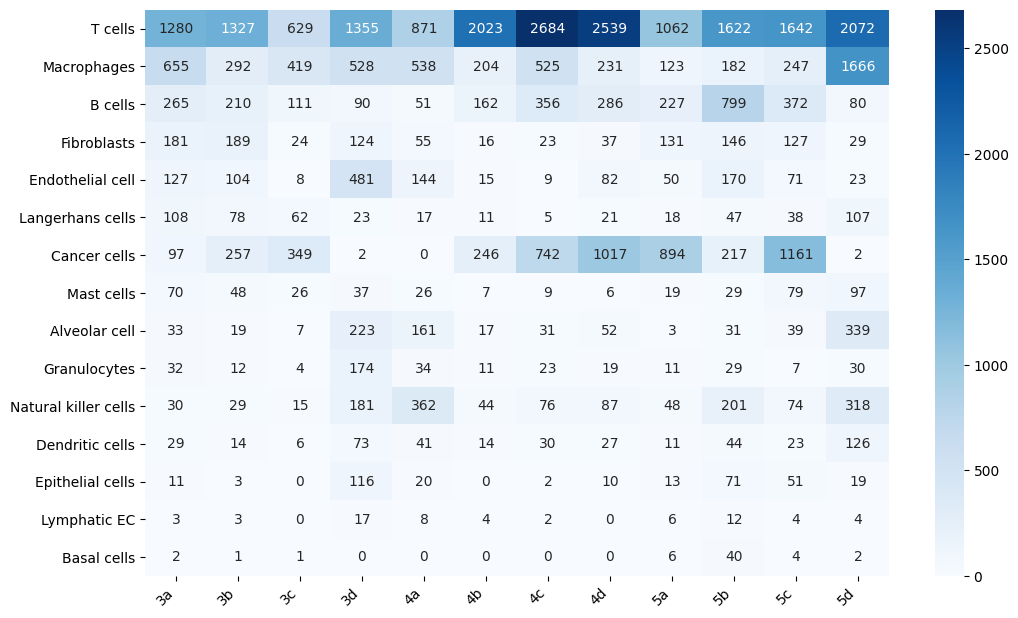

In [44]:
plot_cells('./lung/lung_patient_counts_unique.tsv',
           None
          )

,3a,3b,3c,3d,4a,4b,4c,4d,5a,5b,5c,5d
T cells,1554,1725,813,1695,1089,2276,3090,2954,1266,1943,2042,2463
Cancer cells,548,861,736,280,31,328,897,1262,1043,347,1620,180
B cells,349,309,198,139,70,197,404,354,261,895,497,128
Macrophages,864,475,565,798,1105,265,635,345,191,273,428,2487
Fibroblasts,254,270,41,159,86,24,38,48,143,178,155,69
Endothelial cell,176,158,22,535,170,27,20,96,62,202,98,50
Natural killer cells,49,48,27,226,403,53,95,113,59,229,99,371
Langerhans cells,143,108,83,42,30,14,11,29,28,63,51,137
Mast cells,78,56,34,41,34,11,14,11,19,39,90,110
Dendritic cells,39,23,11,90,55,20,38,31,18,53,34,151


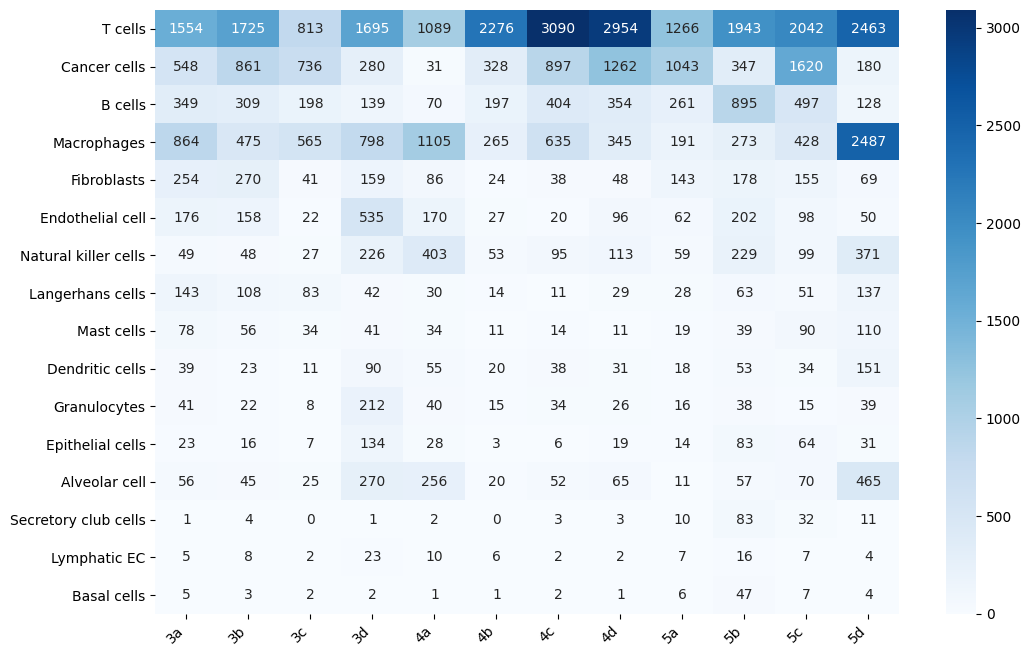

In [45]:
plot_cells('./lung/lung_patient_counts.tsv',
           None
          )

In [6]:
#read the counts dataframe in
df = pd.read_csv('./melanoma/melanoma_patient_counts.tsv',sep='\t',index_col=0)
df = df[sorted(df.columns)]

In [7]:
#read the test groups in
f = open ('./predictions_results/melanoma/JA_patient_test.tsv')
lines = f.readlines()
groups = [line.strip('[]\n').replace("'",'').replace(' ','').split(',')\
          for line in lines]

['Mel121.1', 'Mel60', 'Mel128', 'Mel110', 'Mel129pb', 'Mel82', 'Mel112']
['Mel103', 'Mel478', 'Mel04.3', 'Mel53', 'Mel80', 'Mel126', 'Mel89']
['Mel75', 'Mel72', 'Mel88', 'Mel194', 'Mel98', 'Mel74']
['Mel129pa', 'Mel102', 'Mel84', 'Mel79', 'Mel105', 'Mel106']
['Mel94', 'Mel71', 'Mel58', 'Mel116', 'Mel78', 'Mel81']


,0,1,2,3,4
T.CD4,108,261,194,182,111
T.CD8,128,380,735,352,164
Macrophage,142,75,96,88,19
Mal,200,343,296,871,308
NK,24,30,20,12,6
Endo.,1,32,2,51,18
T.cell,99,163,196,138,110
CAF,13,29,30,15,19
?,52,57,66,71,61


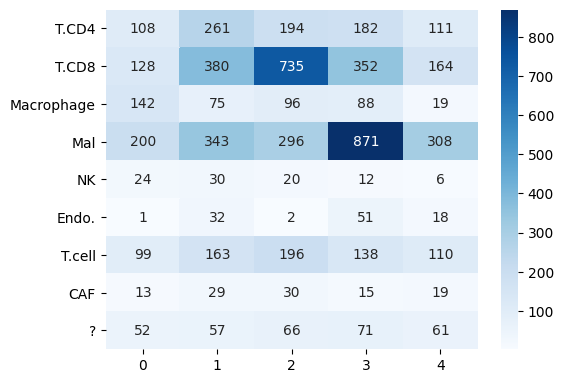

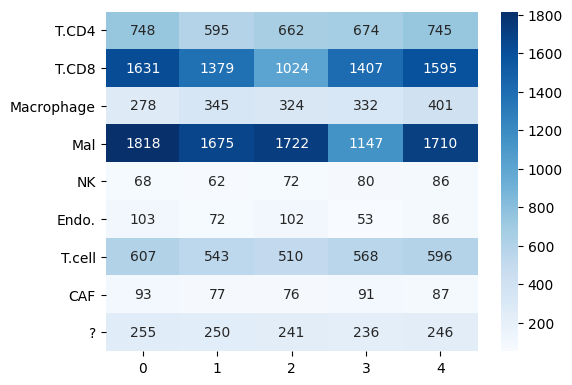

In [16]:
#make dataframes for the training and testing heatmaps
test_hm = pd.DataFrame()
train_hm = pd.DataFrame()

#for each group, add a column to the training and testing heatmaps
for group,index in zip(groups,range(len(groups))):
    print(group)
    
    #select the training and testing groups
    tdf = df[group].copy()
    trdf = df.drop(columns=group)
    #add the sum to the dataframe
    test_hm[str(index)] = tdf.sum(axis=1)
    train_hm[str(index)] = trdf.sum(axis=1)

display(group_hm)

#plot the data
fig, ax = plt.subplots(1,1,dpi=100)
hm = sns.heatmap(test_hm,cmap='Blues',annot=True,fmt="d", yticklabels=True,xticklabels=True)
hm.set_yticklabels(hm.get_yticklabels(),rotation=0)
fig.set_figheight(len(df.index)/2)
plt.show()

fig, ax = plt.subplots(1,1,dpi=100)
hm = sns.heatmap(train_hm,cmap='Blues',annot=True,fmt="d", yticklabels=True,xticklabels=True)
hm.set_yticklabels(hm.get_yticklabels(),rotation=0)
fig.set_figheight(len(df.index)/2)
plt.show()